In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Server serves the ads using Bayesin A/B testing, epsillon greedy or Upper confidence Bound algorithm.
Server serves the ads and the client has clickthrough rates corresponding to a particular ad served. The procedure maximizes the clickthroughrate in an online fashion. Bayesian machine learning methods had the least regret, i.e. lowest difference as compared to optimal clickthroughrate.

In [2]:

    
class Server:
    def __init__(self,algorithm = 'random',epsilon = 0.1):
        #self.type = ['A','B','C']
        self.types = 3
        self.clicks = np.zeros(self.types)
        self.views = np.zeros(self.types)
        self.epsilon = 0.1
        self.ctr = 0
        self.algorithm = algorithm
        self.epsilon = epsilon
        self.a = np.ones(self.types)
        self.b = np.ones(self.types)
        self.mu = np.zeros(self.types)
    def get_ad(self):
        """
        epsilon greedy algorithm
        if rand()<epsilon:
            return random ad
        else:
            return argmax(self.clicks/self.impressions)
            
        bayesian
        get sample from each bandit
        max sample = -1
        if sample > max_sample:
            best_bandit = bandit
            ad = number of bandit
        update bandit
        
        UCB1
        np.argmax(self.mu + np.sqrt(2*np.log(np.sum(self.views))/self.views))
        """
        if self.algorithm == 'random':
            return np.random.choice(self.types)
        if self.algorithm == 'epsilon-greedy':
            #epsilon greedy algorithm
            if np.random.rand()<self.epsilon:
                return np.random.choice(self.types)
            else:
                if (self.views==0).any():
                    return np.random.choice(self.types)
                else:
                    return np.argmax(self.clicks/self.views)
        if self.algorithm == 'bayesian':
            # get sample
            max_sample = -1
            for i in range(self.types):
                sample = np.random.beta(a = self.a[i], b = self.b[i])
                if sample>max_sample:
                    max_sample = sample
                    best_bandit = i
            return best_bandit   
        if self.algorithm == 'UCB1':
            if (self.views==0).any():
                    return np.random.choice(self.types)
            else:
                return np.argmax(self.mu + np.sqrt(2*np.log(np.sum(self.views))/self.views))
             
    def update(self,ad,action):
        self.views[ad]+=1
        self.clicks[ad]+=action
        self.ctr = np.sum(self.clicks)/np.sum(self.views)
        self.a[ad]+=action
        self.b[ad]+=(1-action)
        self.mu[ad] = np.sum(self.clicks[ad])/np.sum(self.views[ad])
        return
class Client:
    def __init__(self):
        self.prob = [0.2,0.5,0.7]
    def action(self,ad):
        return np.random.rand() <self.prob[ad]

regret is 4669.0


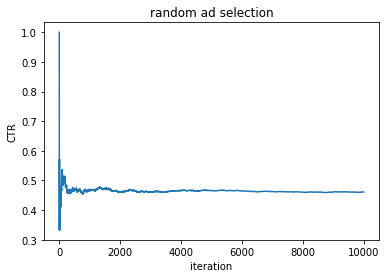

In [5]:
server = Server(algorithm='random')
client = Client()
# plot clickthrough rate vs iteration
# plot bandit views
# plot bandit clicks
# plot bandit clickthrough rate
niter = 10000
ctr = np.zeros(niter)
for i in range(niter):
    # get ad
    ad = server.get_ad()
    # action
    action = client.action(ad)
    # update 
    server.update(ad = ad, action = action)
    # print
    ctr[i] = server.ctr
plt.plot(ctr)
plt.xlabel('iteration')
plt.ylabel('CTR')
plt.title('random ad selection')
# beat 0.47
print('regret is ' +str(0.7*niter - server.clicks[-1]))

regret is 384.0


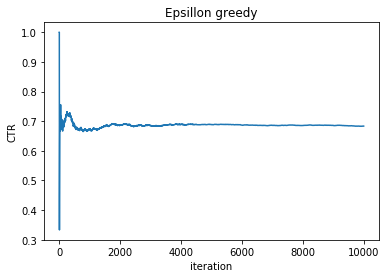

In [8]:
server = Server(algorithm='epsilon-greedy',epsilon=0.1)
client = Client()
# plot clickthrough rate vs iteration
# plot bandit views
# plot bandit clicks
# plot bandit clickthrough rate
niter = 10000
ctr = np.zeros(niter)
for i in range(niter):
    # get ad
    ad = server.get_ad()
    # action
    action = client.action(ad)
    # update 
    server.update(ad = ad, action = action)
    # print
    ctr[i] = server.ctr
plt.plot(ctr)
plt.xlabel('iteration')
plt.ylabel('CTR')
plt.title('Epsillon greedy '+ str(0.1))
# beat 0.47
print('regret is ' +str(0.7*niter - server.clicks[-1]))

regret is 46.0


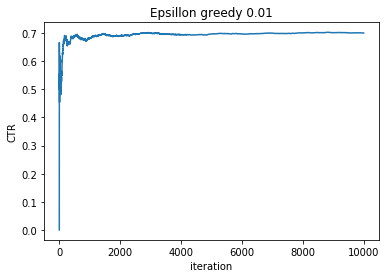

In [9]:
server = Server(algorithm='epsilon-greedy',epsilon=0.01)
client = Client()
# plot clickthrough rate vs iteration
# plot bandit views
# plot bandit clicks
# plot bandit clickthrough rate
niter = 10000
ctr = np.zeros(niter)
for i in range(niter):
    # get ad
    ad = server.get_ad()
    # action
    action = client.action(ad)
    # update 
    server.update(ad = ad, action = action)
    # print
    ctr[i] = server.ctr
plt.plot(ctr)
plt.xlabel('iteration')
plt.ylabel('CTR')
plt.title('Epsillon greedy '+ str(0.01))
# beat 0.47
print('regret is ' +str(0.7*niter - server.clicks[-1]))


regret is 11.0


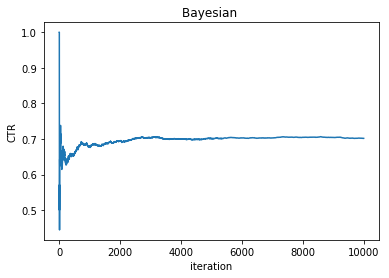

In [10]:
server = Server(algorithm='bayesian')
client = Client()
# plot clickthrough rate vs iteration
# plot bandit views
# plot bandit clicks
# plot bandit clickthrough rate
niter = 10000
ctr = np.zeros(niter)
for i in range(niter):
    # get ad
    ad = server.get_ad()
    # action
    action = client.action(ad)
    # update 
    server.update(ad = ad, action = action)
    # print
    ctr[i] = server.ctr
plt.plot(ctr)
plt.xlabel('iteration')
plt.ylabel('CTR')
plt.title('Bayesian ')
# beat 0.47
print('regret is ' +str(0.7*niter - server.clicks[-1]))

regret is 329.0


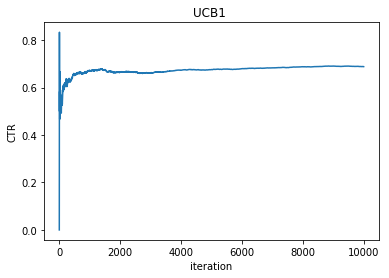

In [11]:
server = Server(algorithm='UCB1')
client = Client()
# plot clickthrough rate vs iteration
# plot bandit views
# plot bandit clicks
# plot bandit clickthrough rate
niter = 10000
ctr = np.zeros(niter)
for i in range(niter):
    # get ad
    ad = server.get_ad()
    # action
    action = client.action(ad)
    # update 
    server.update(ad = ad, action = action)
    # print
    ctr[i] = server.ctr
plt.plot(ctr)
plt.xlabel('iteration')
plt.ylabel('CTR')
plt.title('UCB1 ')
# beat 0.47
print('regret is ' +str(0.7*niter - server.clicks[-1]))